In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizer_v2 import rmsprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import EarlyStopping

In [2]:
df=pd.read_csv('bank.csv',sep=',')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


<AxesSubplot:xlabel='deposit', ylabel='age'>

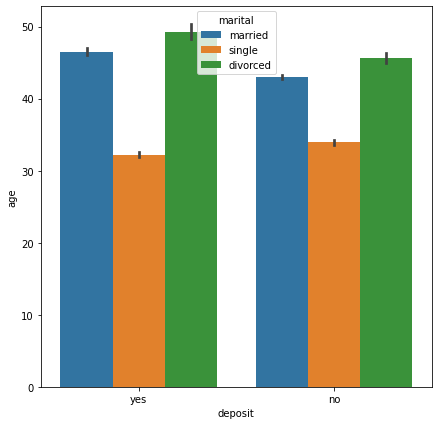

In [4]:
plt.figure(figsize=[7,7])
sns.barplot(data=df, x="deposit", y="age",hue="marital")

<AxesSubplot:xlabel='duration', ylabel='balance'>

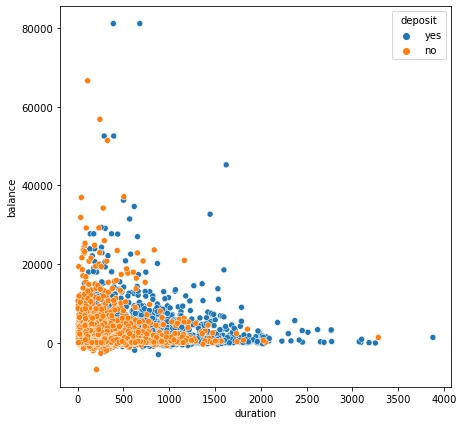

In [5]:
plt.figure(figsize=[7,7])
sns.scatterplot(data=df, x="duration", y="balance",hue="deposit")

<AxesSubplot:xlabel='deposit', ylabel='duration'>

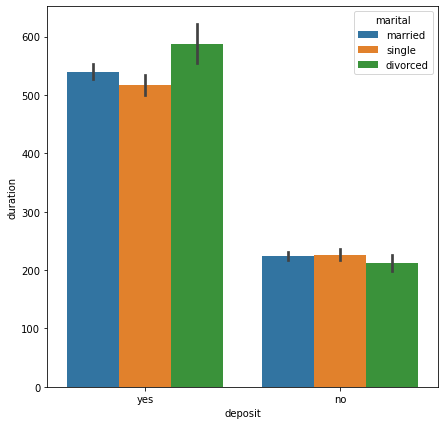

In [6]:
plt.figure(figsize=[7,7])
sns.barplot(data=df, x="deposit", y="duration",hue="marital")

<AxesSubplot:xlabel='job', ylabel='duration'>

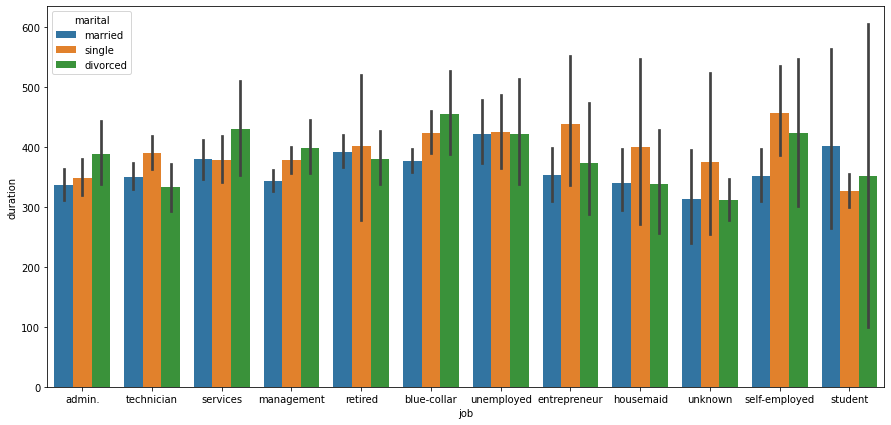

In [7]:
plt.figure(figsize=[15,7])
sns.barplot(data=df, x="job", y="duration",hue="marital")

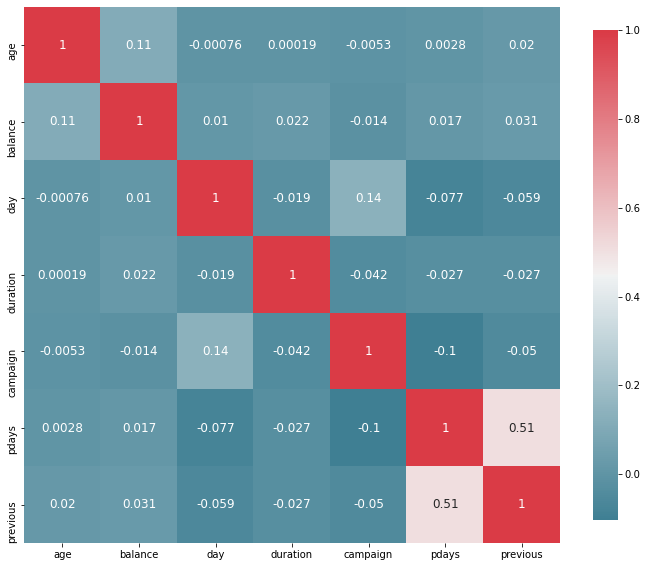

In [8]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )
plot_correlation_map(df)

In [9]:
df.describe()
df.campaign.unique()

array([ 1,  2,  3,  4,  6,  5,  8, 11,  9, 10, 15, 12, 14,  7, 24, 13, 17,
       29, 21, 20, 16, 32, 19, 25, 22, 43, 18, 41, 63, 27, 30, 26, 23, 28,
       33, 31], dtype=int64)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [11]:
print("Unknown values percentage")
for column in df.columns:
    print(column, ":    \t",round(list(df[column]=='unknown').count(True)/df.shape[0],2)*100,'%' )

Unknown values percentage
age :    	 0.0 %
job :    	 1.0 %
marital :    	 0.0 %
education :    	 4.0 %
default :    	 0.0 %
balance :    	 0.0 %
housing :    	 0.0 %
loan :    	 0.0 %
contact :    	 21.0 %
day :    	 0.0 %
month :    	 0.0 %
duration :    	 0.0 %
campaign :    	 0.0 %
pdays :    	 0.0 %
previous :    	 0.0 %
poutcome :    	 75.0 %
deposit :    	 0.0 %


In [12]:
df.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [13]:
for i in range(df.shape[0]):
    if df['job'][i]=='unknown':
        df['job'][i]='management'
df.job.value_counts()

<ipython-input-13-b8fa820bd9ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job'][i]='management'


management       2636
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
Name: job, dtype: int64

In [14]:
df.education.value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [15]:
for i in range(df.shape[0]):
    if df['education'][i]=='unknown':
        df['education'][i]='secondary'
df.education.value_counts()

<ipython-input-15-d7728de93d69>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education'][i]='secondary'


secondary    5973
tertiary     3689
primary      1500
Name: education, dtype: int64

In [16]:
df.contact.value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [17]:
for i in range(df.shape[0]):
    if df['contact'][i]=='unknown':
        df['contact'][i]='cellular'
df.contact.value_counts()

<ipython-input-17-96426de5c345>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['contact'][i]='cellular'


cellular     10388
telephone      774
Name: contact, dtype: int64

In [18]:
df.drop(columns=['poutcome','day','campaign'],inplace=True)

In [19]:
df["job"]=df["job"].map({"admin.": 1, "technician": 2, "services": 3, "management": 4, "retired": 5,
                         "blue-collar": 6, "unemployed": 7, "entrepreneur": 8, "housemaid": 9, "self-employed": 10,
                        'student': 11})
df["marital"]=df["marital"].map({"married": 1, "single": 2,'divorced': 3})
df["education"]=df["education"].map({"primary": 1,"secondary": 2, "tertiary": 3})
df["default"]=df["default"].map({"no": 0, "yes": 1})
df["housing"]=df["housing"].map({"no": 0, "yes": 1})
df["loan"]=df["loan"].map({"no": 0, "yes": 1})
df["contact"]=df["contact"].map({"cellular": 0, "telephone": 1})
df["month"]=df["month"].map({'jan': 1,'feb': 2,'mar': 3,'apr': 4,'may': 5,'jun': 6,'jul': 7,'aug': 8,'sep': 9, 'oct': 10,'nov': 11,'dec': 12})
df["deposit"]=df["deposit"].map({"no": 0, "yes": 1})

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,pdays,previous,deposit
0,59,1,1,2,0,2343,1,0,0,5,1042,-1,0,1
1,56,1,1,2,0,45,0,0,0,5,1467,-1,0,1
2,41,2,1,2,0,1270,1,0,0,5,1389,-1,0,1
3,55,3,1,2,0,2476,1,0,0,5,579,-1,0,1
4,54,1,1,3,0,184,0,0,0,5,673,-1,0,1


In [20]:
from sklearn import preprocessing
x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.rename(columns={0: "age", 1: "job", 2: "marital", 3: "education",
                    4: "default	", 5: "balance", 6: "housing", 7: "loan",
                    8: "contact",9: "month",10: "duration",
                    11: "pdays",12: "previous",13: "deposit"},inplace=True)

df.head()

,age,job,marital,education,default\t,balance,housing,loan,contact,month,duration,pdays,previous,deposit
0,0.532468,0.0,0.0,0.5,0.0,0.104371,1.0,0.0,0.0,0.363636,0.268110,0.0,0.0,1.0
1,0.493506,0.0,0.0,0.5,0.0,0.078273,0.0,0.0,0.0,0.363636,0.377675,0.0,0.0,1.0
2,0.298701,0.1,0.0,0.5,0.0,0.092185,1.0,0.0,0.0,0.363636,0.357566,0.0,0.0,1.0
3,0.480519,0.2,0.0,0.5,0.0,0.105882,1.0,0.0,0.0,0.363636,0.148750,0.0,0.0,1.0
4,0.467532,0.0,0.0,1.0,0.0,0.079851,0.0,0.0,0.0,0.363636,0.172983,0.0,0.0,1.0


In [21]:
X = df.drop(columns=['deposit'])
Y = df['deposit']

encoder=LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
Y = keras.utils.to_categorical(encoded_Y)

In [22]:
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size = 0.1)
X_model, X_valid, Y_model, Y_valid = train_test_split(X_train, Y_train, test_size = 0.15)

In [38]:
model= Sequential([
    Dense(128, input_dim = 13, activation='relu'),
    Dropout(0.2, input_shape=(128,)),
    Dense(64,  activation='relu'),
    Dense(2, activation='sigmoid') ])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 128)               1792      
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_22 (Dense)             (None, 2)                 130       
Total params: 10,178
Trainable params: 10,178
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
mycallbacks = [EarlyStopping(monitor='val_loss', patience=6)]

history = model.fit(X_train, Y_train,
                    batch_size=32,
                    epochs=100,
                    verbose=1,
                    callbacks = mycallbacks,
                    validation_data=(X_valid, Y_valid))

Epoch 1/100
314/314 [==============================] - 1s 1ms/step - loss: 0.3750 - accuracy: 0.8338 - val_loss: 0.3440 - val_accuracy: 0.8567
Epoch 2/100
314/314 [==============================] - 0s 771us/step - loss: 0.3738 - accuracy: 0.8339 - val_loss: 0.3469 - val_accuracy: 0.8593
Epoch 3/100
314/314 [==============================] - 0s 860us/step - loss: 0.3710 - accuracy: 0.8344 - val_loss: 0.3387 - val_accuracy: 0.8620
Epoch 4/100
314/314 [==============================] - 0s 832us/step - loss: 0.3724 - accuracy: 0.8310 - val_loss: 0.3473 - val_accuracy: 0.8467
Epoch 5/100
314/314 [==============================] - 0s 808us/step - loss: 0.3713 - accuracy: 0.8333 - val_loss: 0.3412 - val_accuracy: 0.8593
Epoch 6/100
314/314 [==============================] - 0s 830us/step - loss: 0.3665 - accuracy: 0.8361 - val_loss: 0.3428 - val_accuracy: 0.8494
Epoch 7/100
314/314 [==============================] - 0s 802us/step - loss: 0.3697 - accuracy: 0.8377 - val_loss: 0.3386 - val_accu

In [41]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.8227394819259644
